## Задача


Мне нужно показать:

1) сколько всего разных лиц помимо ЧМПЗ выпускают продукцию с обозначением "Губернская"

2) Какую долю в общей массе иных производителей составляет продукция ЧМПЗ

3) Сколько лиц и кг произведено до даты приоритета товарных знаков "Губернская", "Губернские"


## Предполагаемый алгоритм

1. выбираем отдельно Губернский, Губернская и Губернские в поле "Наименование продукции"
2. Далее выбираем все уникальные записи в поле "Наименование продукции"
3. Далее суммируем количество килограмм по уникальной продукции за весь период из поля "Объем"
4. Далее берем дату первой и последней транзакции с уникальным товаром из поля "Дата сертификата"
5. Далее берем наименование лица из поля "Площадка" и его ИНН из поля "ИНН ХС"


## Формат выдачи


формируем таблицу в Экселе со следующими полями:

1. Лицо
2. ИНН
3. Продукт
4. Дата первой транзакции
5. Дата последней транзакции
6. Сумма килограммов по данному товару данного лица


## Решение

In [2]:
import pandas as pd

Типизирую ИНН как строку, чтобы не съедались нули в первой позиции


In [3]:
basic = pd.read_excel('119776_Производство_с_наименованием_продукции_Губернские.xlsx', dtype={'ИНН ХС': str})

In [4]:
basic

,Уникальный идентификатор сертификата (uuid),ID сертификата,Дата сертификата,Статус сертификата,Тип сертификата,Хозяйствующий субъект,ИНН ХС,Площадка,Номер площадки,Регион отгрузки,Тип продукции,Продукция,Вид продукции,Наименование продукции,Объем,Единица измерения
0,33db7310-e612-4852-8c55-35c4635fcba9,194493328,2018-01-16 06:09:31,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),2.146,кг
1,99cc9ef0-c4c1-42c2-a1ff-29ca2e417c9e,194493592,2018-01-16 06:09:49,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),1.257,кг
2,02174a6d-91bb-4dba-90d2-abd411c41d17,194595789,2018-01-16 08:01:33,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из говядины,готовая продукция из говядины,Говядина Губернская к/в (п/вак порцион) кг,0.943,кг
3,db973036-4fd2-4c0a-8a4a-11e02880322a,197089477,2018-01-18 01:44:28,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),0.882,кг
4,168b74a5-351d-4745-9f2c-533ad9bad347,197089927,2018-01-18 01:44:55,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),1.069,кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283527,45fba17b-8f6d-4bd1-be92-5cdab2600199,26776622486,2024-11-24 19:04:19,Оформлен,Производственный,ХАБИБУЛЛИН ИННОКЕНТИЙ ЗАРИФУЛЛОВИЧ,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сервелат ""Губернский"" 0,350 кг",3.150,кг
283528,6a178c66-150d-491d-af67-3342bdde9170,26776622509,2024-11-24 19:04:19,Оформлен,Производственный,ХАБИБУЛЛИН ИННОКЕНТИЙ ЗАРИФУЛЛОВИЧ,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сервелат ""Губернский"" 0,600 кг",1.800,кг
283529,8e14bb6b-e787-480f-8b65-dd8dcbd183be,26777552990,2024-11-24 20:58:48,Оформлен,Производственный,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ЧЕРКИЗОВСКИЙ МЯСОПЕРЕРАБ...",7718013714,"Ульяновский филиал АО ""Черкизовский мясоперера...",RU73:96029389,Ульяновская область,Пищевые продукты,готовая продукция из мяса птицы,готовые пищевые продукты из мяса птицы,"Изделие колбасное из мяса кур вареное, охлажде...",522.688,кг
283530,d2a1b6cf-2ca7-4d71-88f3-e5267b1d3f92,26778200657,2024-11-24 22:10:32,Оформлен,Производственный,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПТИЦЕФАБРИКА ""РЕФТИНСКАЯ""",6603025045,"АО ""Птицефабрика ""Рефтинская""",RU66:64955092,Свердловская область,Пищевые продукты,готовая продукция из мяса птицы,готовые пищевые продукты из мяса птицы,"Колбаса вареная 2 сорта ""Губернская""",36.480,кг


In [5]:
len(basic)

283532

In [6]:
gub_filtered=basic[basic['Наименование продукции'].str.contains('губернский|губернская|Губернские|Губернское', case=False, na=False)]

In [7]:
gub_filtered

,Уникальный идентификатор сертификата (uuid),ID сертификата,Дата сертификата,Статус сертификата,Тип сертификата,Хозяйствующий субъект,ИНН ХС,Площадка,Номер площадки,Регион отгрузки,Тип продукции,Продукция,Вид продукции,Наименование продукции,Объем,Единица измерения
0,33db7310-e612-4852-8c55-35c4635fcba9,194493328,2018-01-16 06:09:31,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),2.146,кг
1,99cc9ef0-c4c1-42c2-a1ff-29ca2e417c9e,194493592,2018-01-16 06:09:49,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),1.257,кг
2,02174a6d-91bb-4dba-90d2-abd411c41d17,194595789,2018-01-16 08:01:33,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из говядины,готовая продукция из говядины,Говядина Губернская к/в (п/вак порцион) кг,0.943,кг
3,db973036-4fd2-4c0a-8a4a-11e02880322a,197089477,2018-01-18 01:44:28,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Ребра Губернские к/в (газ),0.882,кг
4,168b74a5-351d-4745-9f2c-533ad9bad347,197089927,2018-01-18 01:44:55,Оформлен,Производственный,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ЦАРИ...",3443134256,"ООО ""Царицынский комбинат""",RU34:92510599,Волгоградская область,Пищевые продукты,готовая продукция из свинины,готовая продукция из свинины,Карбонад Губернский к/в (п/вак),1.069,кг
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283527,45fba17b-8f6d-4bd1-be92-5cdab2600199,26776622486,2024-11-24 19:04:19,Оформлен,Производственный,ХАБИБУЛЛИН ИННОКЕНТИЙ ЗАРИФУЛЛОВИЧ,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сервелат ""Губернский"" 0,350 кг",3.150,кг
283528,6a178c66-150d-491d-af67-3342bdde9170,26776622509,2024-11-24 19:04:19,Оформлен,Производственный,ХАБИБУЛЛИН ИННОКЕНТИЙ ЗАРИФУЛЛОВИЧ,246410058422,ИП Хабибуллин Иннокентий Зарифуллович,RU024:61327585,Красноярский край,Пищевые продукты,готовые мясные продукты,готовые мясные продукты,"Сервелат ""Губернский"" 0,600 кг",1.800,кг
283529,8e14bb6b-e787-480f-8b65-dd8dcbd183be,26777552990,2024-11-24 20:58:48,Оформлен,Производственный,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ЧЕРКИЗОВСКИЙ МЯСОПЕРЕРАБ...",7718013714,"Ульяновский филиал АО ""Черкизовский мясоперера...",RU73:96029389,Ульяновская область,Пищевые продукты,готовая продукция из мяса птицы,готовые пищевые продукты из мяса птицы,"Изделие колбасное из мяса кур вареное, охлажде...",522.688,кг
283530,d2a1b6cf-2ca7-4d71-88f3-e5267b1d3f92,26778200657,2024-11-24 22:10:32,Оформлен,Производственный,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ПТИЦЕФАБРИКА ""РЕФТИНСКАЯ""",6603025045,"АО ""Птицефабрика ""Рефтинская""",RU66:64955092,Свердловская область,Пищевые продукты,готовая продукция из мяса птицы,готовые пищевые продукты из мяса птицы,"Колбаса вареная 2 сорта ""Губернская""",36.480,кг


In [8]:
len(gub_filtered)

283249

По первому вхождению даты сертификата

In [9]:
df_grouped = gub_filtered.groupby('Наименование продукции').agg({
    'Объем': 'sum',
    'Хозяйствующий субъект': 'first',
    'ИНН ХС': 'first',
    'Дата сертификата': 'first',
}).reset_index()


По последнему вхождению даты сертификата

In [10]:
df_grouped2 = gub_filtered.groupby('Наименование продукции').agg({
    'Объем': 'sum',
    'Хозяйствующий субъект': 'first',
    'ИНН ХС': 'first',
    'Дата сертификата': 'last'
}).reset_index()

In [11]:
df_grouped = df_grouped.rename(columns={'Дата сертификата': 'Дата сертификата - первая', 'Объем': 'Объем, кг'})

In [12]:
df_grouped['Дата сертификата - последняя'] = df_grouped2['Дата сертификата']

In [13]:
df_grouped

,Наименование продукции,"Объем, кг",Хозяйствующий субъект,ИНН ХС,Дата сертификата - первая,Дата сертификата - последняя
0,"""Грудинка ""Губернская"" к/в""",1075.000,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ СЕЛЬС...,2634036716,2018-12-03 16:24:34,2019-01-31 13:26:57
1,"""Сервелат Губернский ""колбаса,в/у(0,8кг)шт ст/...",38475.200,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""СИБИ...",5405305000,2022-03-31 06:40:36,2024-03-17 06:11:51
2,"021 Сыр полутвердый ""Губернский"" козий",2.000,ГАЛАНОВА ЛЮДМИЛА ЛЕОНАРДОВНА,782065556150,2021-06-08 21:04:44,2021-06-08 21:04:44
3,"041 Сыр полутвердый ""Губернский"" с пажитником",1020.064,ГАЛАНОВ КОНСТАНТИН ВАДИМОВИЧ,782095122181,2019-08-04 20:26:46,2024-03-28 15:32:55
4,"041 Сыр полутвердый Изварский ""Губернский"" с п...",75.000,ГАЛАНОВА ЛЮДМИЛА ЛЕОНАРДОВНА,782065556150,2024-05-29 15:56:36,2024-07-03 11:35:57
...,...,...,...,...,...,...
608,сыр Губернский,776.000,КОНГУР ЕЛЕНА НИКОЛАЕВНА,352801900600,2021-03-10 12:08:46,2024-08-20 17:54:26
609,сыр Губернский массовая доля жира 50%,10015.750,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ПРОГ...",9718132659,2021-08-12 12:27:01,2021-08-12 12:27:01
610,"творог ТМ ""Губернские традиции"" с м.д.ж. 5%, п...",8342.800,"АКЦИОНЕРНОЕ ОБЩЕСТВО ""ЛАКТИС""",4325000106,2021-06-30 00:10:11,2022-07-13 00:19:16
611,"шницель "" Губернский"" весовой",90.000,ЧУДИНОВ ИРИК МИХАЙЛОВИЧ,025702278256,2019-06-21 17:33:47,2019-08-09 20:26:05


In [14]:
df_grouped = df_grouped[['Хозяйствующий субъект', 'ИНН ХС', 'Наименование продукции', 'Дата сертификата - первая', 
                        'Дата сертификата - последняя', 'Объем, кг']]

In [16]:
df_grouped.to_excel('gub_filtered_grouped_by_all_in.xlsx')

## Визуализация

In [17]:
import matplotlib.pyplot as plt

Гистограмма распределения по объёму, по иксу шкала - логарифмическая

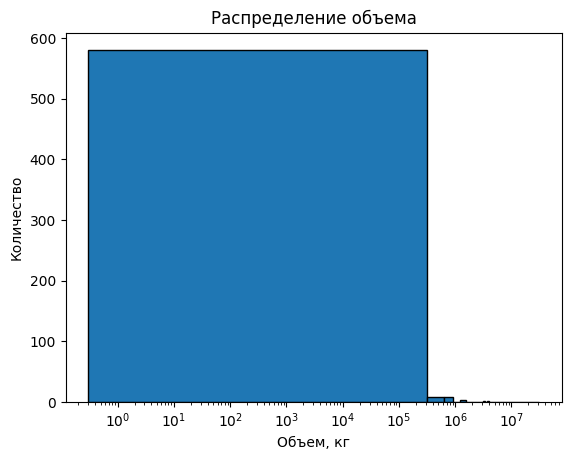

In [22]:
plt.hist(df_grouped['Объем, кг'], bins=100, edgecolor='black')
plt.xscale('log')
plt.xlabel('Объем, кг')
plt.ylabel('Количество')
plt.title('Распределение объема')
plt.show()

Упрощенное распределение по объёму, вертикальная шкала - логарифмическая

Оранжевая линия - медиана, нижняя грань "коробки" - квартиль 25%, верхняя грань - квартиль 75%

In [12]:
interpretation = """

      Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR 
                       
"""

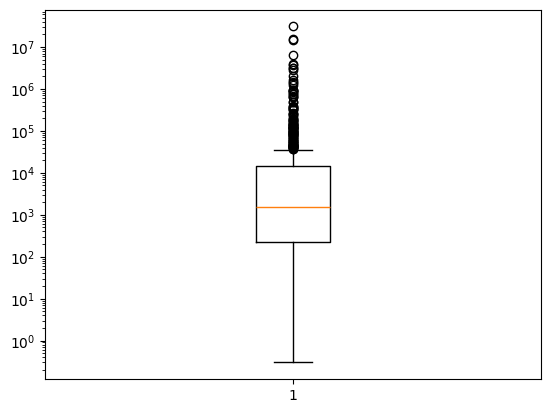

In [32]:
plt.boxplot(df_grouped['Объем, кг'])
plt.yscale('log')
plt.show()